In [1]:
import tensorflow as tf

import numpy as np
from matplotlib import pyplot as plt 

from datasets.Dataset import Dataset
from core.argo.core.ArgoLauncher import ArgoLauncher
from core.argo.core.TFDeepLearningModel import load_model, load_network
from core.argo.core.utils.argo_utils import load_class
from core.transform.transform import get_transform_module, check_dataset_shapes

/data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


 From /home/deliaed/adversarial/core/argo/core/hooks/ArgoHook.py:25: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.


 From /home/deliaed/adversarial/core/argo/core/hooks/CheckpointSaverHook.py:7: The name tf.train.SessionRunArgs is deprecated. Please use tf.estimator.SessionRunArgs instead.


 From /home/deliaed/adversarial/core/argo/core/hooks/CheckpointSaverHook.py:13: The name tf.train.SessionRunHook is deprecated. Please use tf.estimator.SessionRunHook instead.



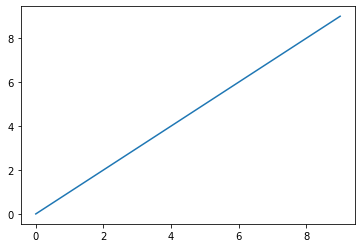

In [2]:
plt.plot(np.arange(10))

In [3]:
tf.set_random_seed(1000)

tf.reset_default_graph()

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='1'
sess_config = tf.ConfigProto()
sess_config.gpu_options.allow_growth=True
sess = tf.Session(config = sess_config)

In [4]:
# ffconffile = '/home/luigi/adversarial/prediction/temp/MNIST-c-st0/FF_st0-stp0-st0-stp0-re0.0001-bs32-trGD_lr0.05-cNo-D200_D200_D10-aR-wix-bic0.1-r0/experiment.conf'
# ffconffile = '/data/ironman_hd1/FashionMNIST-st0/FF_st0-stp0-re0.0-bs32-trA_lr0.001_bo0.9_bt0.999-C32o3-3_C32o3-3_D200_D10-arelu-wix-bic0.1-r0/experiment.conf'
# NB i saved the model every 20 epochs
# 34360 # 68720 # 103080
#ff_global_step = 68720
ffconffile = "/data/thor_hd1/adv_new_models/FashionMNIST-st0/FF-cCE-st0-stp0.0-bs100-trA_lr0.0001_bo0.9_bt0.999-cNo-nC32o3,3_BN_P2s2_C32o3,3_BN_P2s2_DOr0.3_C32o3,3_BN_P2s2_C32o3,3_BN_P2s2_DOr0.3_D500_D10-cpS-aR-wix-bic0.1-wrLtwo0.001-brLtwo0.001-r0/experiment.conf"
# ffconffile = "/data/wonderwoman_hd3/adversarial_small/prediction/FashionMNIST-st0/FF-cCE-st2-stp0.1-bs32-trA_lrm1e-07E.i0.0001.s10000.0.r0.99_bo0.9_bt0.999-cGN100.0-nCNo64,64k3,3s2,2_D200_D10-cpS-aR-wign-bic10.0-wrLtwo0.001-r1/experiment.conf"
ff_global_step = None

# # autoencconffile = '/home/luigi/adversarial/vae/temp/MNIST-c-st0/VAE-cELBO_b1.0_wuW5-d0-st1-stp0.01-re1e-05-bs128-trA_lr0.0001_bo0.9_bt0.999-cGN3-e_D200_D200_GDd-d_D200_D200_GD01d.scT-cpS-aE-wix-bic0.1-r0/experiment.conf'
# # autoencconffile = '/data/ironman_hd1/FashionMNIST-st0/VAE-cELBO_b1.0_wuW5-st1-stp0.01-d0-re1e-05-bs32-trA_lr0.001_bo0.9_bt0.999-e_CN-o256-512-1024k3-3s2-2-1_GDd64-d_D50176_BR_CNT-o512-256-1k3-3s1-2-2_LNDd-cpS-arelu-wix-bic0.1-r0/experiment.conf'
# autoencconffile = "/data/wonderwoman_hd3/adversarial_small/vae/FashionMNIST-st0/VAE-cELBO_b1.0_wuW5-s10-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_GDd32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/experiment.conf"
# ae_global_step = None  # 


In [5]:
is_training = False

In [6]:
ff_dataset_conf, ff_model_parameters, ff_config = ArgoLauncher.process_conf_file(ffconffile)
ff_dataset = Dataset.load_dataset(ff_dataset_conf)
_x_shape = ff_dataset.x_shape_eval

full_class_path = "prediction.core." + ff_model_parameters["model"]
prediction_model_class = load_class(full_class_path)

ff_network, ff_checkpoint_name = load_network(prediction_model_class, ffconffile, ff_dataset, global_step=ff_global_step)
x_shape = (None,) + _x_shape

dummy_x = tf.placeholder(tf.float32, shape=x_shape, name='dummy_input')


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
 From /home/deliaed/adversarial/datasets/FashionMNIST.py:159: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
 From /data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
 From /data1/env/tf1.14.0/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (

In [7]:
# LOAD FF NETWORK
dummy_logits = ff_network(dummy_x, is_training = is_training)
ff_network.restore(sess, ff_checkpoint_name)

# CALLABLE
ff_module = ff_network.module



 From /data1/env/tf1.14.0/lib/python3.6/site-packages/sonnet/python/modules/base.py:278: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

Parsing network network...
 Loading sonnet module Conv2D

 From /data1/env/tf1.14.0/lib/python3.6/site-packages/sonnet/python/modules/conv.py:134: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
 From /home/deliaed/adversarial/prediction/core/argo/core/network/MaxPooling2D.py:25: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
Instructions for updating:
Use keras.layers.dropout instead

In [8]:
# DATASET SECTION
# these are all the datasets tag available
from prediction.datasets.Dataset import TRAIN_LOOP, TRAIN, VALIDATION, TEST, \
                TRAIN_SHUFFLED, VALIDATION_SHUFFLED, TEST_SHUFFLED


BATCH_TRAIN=1
BATCH_EVAL=1

dataset = ff_dataset

datasets_nodes, ds_handle, datasets_initializers, datasets_handles_nodes, _ = dataset.get_dataset_with_handle(BATCH_TRAIN, BATCH_EVAL)
x, y = datasets_nodes
y = tf.cast(y, tf.int32)

print("next batch of input x:", x)
print("next batch of labels y:", y)

datasets_handles = sess.run(datasets_handles_nodes)


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
 From /home/deliaed/adversarial/datasets/Dataset.py:291: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which ma

In [9]:
# define probs and preds, starting from x

logits = ff_module(x)


accuracy = 100. * tf.reduce_mean(tf.cast(
                   tf.equal(tf.argmax(logits, axis = 1),
                         tf.cast(y, dtype = tf.int64)),
                         dtype = tf.float32))

preds = tf.argmax(logits, axis=1, output_type=tf.int32)

print(logits, preds)

probs = tf.nn.softmax(logits)
correct = tf.equal(preds, y)


Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
Tensor("network/linear_1/add:0", shape=(?, 10), dtype=float32) Tensor("ArgMax_1:0", shape=(?,), dtype=int32)


In [10]:
input_shape = dataset.x_shape
n_classes = dataset.n_labels
print(input_shape, n_classes)

(28, 28, 1) 10


In [11]:
#THIS IS HOW YOU READ IN SEQUENCE

#first select which dataset you are interested in,
# any dataset needs to be initialized with the exception of TRAIN_LOOP since it is an infinite loop and need not be initialized
dataset_str = TRAIN

sess.run(datasets_initializers[dataset_str])
x_np, y_np = sess.run([x,y], feed_dict = {ds_handle : datasets_handles[dataset_str]})

print(x_np.shape, y_np.shape)
print(y_np)

(1, 28, 28, 1) (1,)
[4]


# Classifier

In [16]:

def get_cmap(img):
    ch = None
    if len(img.shape) == 3:
        ch = 2
    elif len(img.shape) == 4:
        ch = 3
    else:
        raise Exception("expeting either a 3D or a 4D tensor")
    
    channels = img.shape[ch]
    if channels==3:
        cmap = 'rgb'
    elif channels==1:
        cmap = 'gray'
    else:
        raise Exception("image channel value not valid")
    return cmap

def classify(img, inputs, probs, correct_class=None, target_class=None):
    if img.shape[0]!=1:
        raise Exception("expected a batch of a single image, received shape: %s"%img.shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)
    p = sess.run(probs, feed_dict={inputs: img})[0]
    
    cmap = get_cmap(img)
    ax1.imshow(np.squeeze(img), cmap = cmap)
    fig.sca(ax1)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10),
               [dataset.label_to_name(i)[:15] for i in topk],
               rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()

def plot_imgs(imgs, rows, cols):
    f, axarr = plt.subplots(rows, cols)
    axarr = axarr.reshape(rows,cols)
    cmap = get_cmap(imgs[0])
    for i in range(rows):
        for j in range(cols):
            axarr[i,j].imshow(np.squeeze(imgs[i*cols+j]), cmap = cmap)


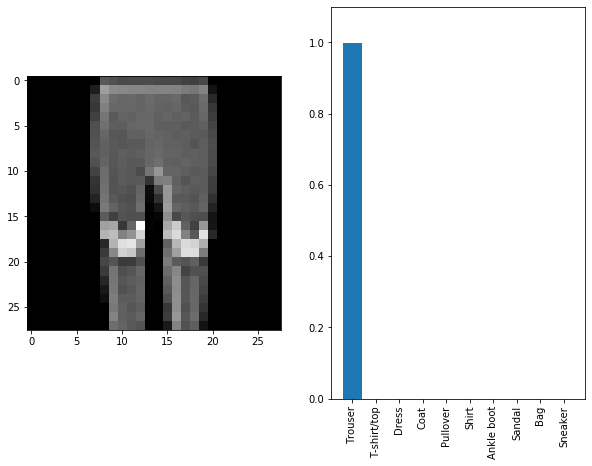

In [17]:
classify(dataset.get_raw_elements(TRAIN, [33]), x, probs)

In [18]:
# find the first image which is misclassified
dataset_str = TRAIN

sess.run(datasets_initializers[dataset_str])
i = 0
while True:
    correct_np = sess.run(correct, feed_dict={ds_handle : datasets_handles[dataset_str]})
    if (correct_np == False):
        print("Image misclassified: ", i)
        break
    i+=1

Image misclassified:  49


correct label: ['Bag']


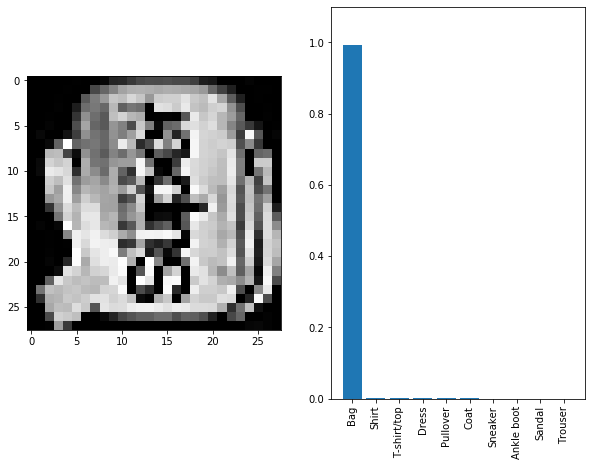

In [19]:
# select an image and look at its prediction
no_img = 12
dataset_str = TRAIN

classify(dataset.get_raw_elements(dataset_str, index_list=[no_img]), x, probs)

print("correct label:",
      list(map(dataset.label_to_name, dataset.get_raw_labels(dataset_str, [no_img])))
     )

In [20]:
#define the loss
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                  labels=tf.one_hot(y, n_classes))
grad, = tf.gradients(loss, x)
print(logits)

Tensor("network/linear_1/add:0", shape=(?, 10), dtype=float32)


(1, 28, 28, 1) (1,)
correct label:  [1] Trouser


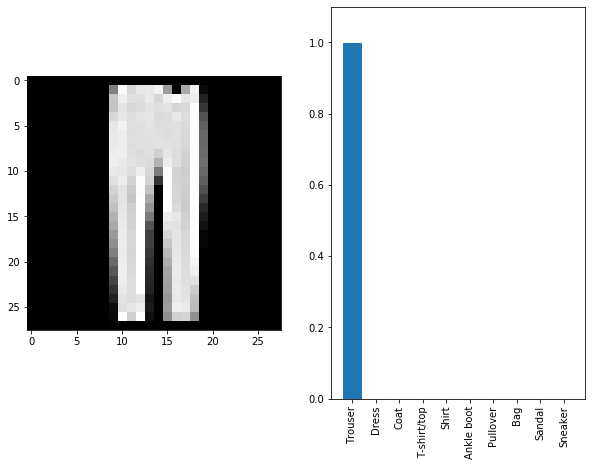

In [21]:
# now let's select an image for the attack

no_img = 24
dataset_str = TRAIN

x_orig = dataset.get_raw_elements(dataset_str, index_list=[no_img])
y_orig = dataset.get_raw_labels(dataset_str, index_list=[no_img])

print(x_orig.shape, y_orig.shape)
classify(x_orig, x, probs)
print("correct label: ", y_orig, dataset.label_to_name(y_orig[0]))


step 0, pred=1 Trouser
step 1, pred=1 Trouser
step 2, pred=1 Trouser
step 3, pred=1 Trouser
step 4, pred=1 Trouser
step 5, pred=1 Trouser
step 6, pred=1 Trouser
step 7, pred=1 Trouser
step 8, pred=1 Trouser
step 9, pred=1 Trouser
step 10, pred=1 Trouser
step 11, pred=1 Trouser
step 12, pred=1 Trouser
step 13, pred=1 Trouser
step 14, pred=1 Trouser
step 15, pred=1 Trouser
step 16, pred=1 Trouser
step 17, pred=1 Trouser
step 18, pred=1 Trouser
step 19, pred=1 Trouser
step 20, pred=1 Trouser
step 21, pred=1 Trouser
step 22, pred=1 Trouser
step 23, pred=1 Trouser
step 24, pred=1 Trouser
step 25, pred=1 Trouser
step 26, pred=1 Trouser
step 27, pred=1 Trouser
step 28, pred=1 Trouser
step 29, pred=1 Trouser
step 30, pred=1 Trouser
step 31, pred=1 Trouser
step 32, pred=1 Trouser
step 33, pred=1 Trouser
step 34, pred=1 Trouser
step 35, pred=1 Trouser
step 36, pred=1 Trouser
step 37, pred=1 Trouser
step 38, pred=1 Trouser
step 39, pred=1 Trouser


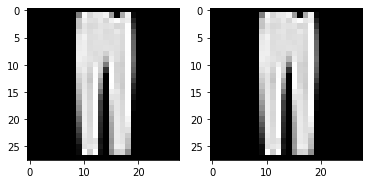

In [22]:
# PGD
LR = 0.1
EPSILON = 0.05

lower = np.clip(x_orig-EPSILON, -1, 1)
upper = np.clip(x_orig+EPSILON, -1, 1)
adv = np.copy(x_orig)

for i in range(40):
    g, p = sess.run([grad, preds], {x: adv, y: y_orig})
    print('step %d, pred=%d %s' % (i, p, dataset.label_to_name(p[0])))
    # step
    adv += LR * g
    # project
    adv = np.clip(adv, lower, upper)

plot_imgs([x_orig, adv], 1, 2)

In [19]:
# # OUR PGD
# list_logits = [tf.slice(logits, [0, i], [1, 1]) for i in range(n_classes)]
# grad_logits = [tf.gradients(list_logits[i], x)[0] for i in range(n_classes)]
# print(list_logits[1])
# print(grad_logits[1])

# numerator_matrices = tf.stack(
#     [(grad_logits[i] - grad_logits[y_orig]) * tf.exp(list_logits[i] - list_logits[y_orig]) \
#          for i in range(n_classes)])
# print(numerator)


# tot_grad = numerator/tf.reduce_sum(tf.exp(logits - list_logits[y_orig])) 

# LR = 0.1
# adv = np.copy(orig)

# for i in range(40):
#     g, p = sess.run([tot_grad, preds], {x: adv, y: y_orig})
#     print('step %d, pred=%d' % (i, p))
#     print(g)
#     # step
#     adv += LR * g
#     # project
#     adv = np.clip(adv, lower, upper)

Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear

 From /home/deliaed/adversarial/CarliniWagner.py:77: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]


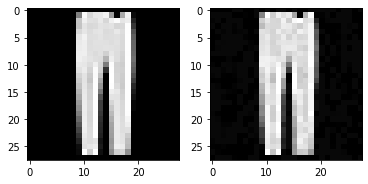

In [23]:
#CW
from CarliniWagner import CarliniWagner

LR = 0.1
NUM_STEPS = 10
EPSILON = 0.07

attack = CarliniWagner(sess, ff_module, num_steps=NUM_STEPS, epsilon=EPSILON,
                         ord=0., data_interval=[-1,1.], learning_rate=LR,
                         input_shape=input_shape, n_classes=n_classes)

adv = attack.run(x_orig[0], y_orig[0])

plot_imgs([x_orig, adv], 1, 2)


Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]


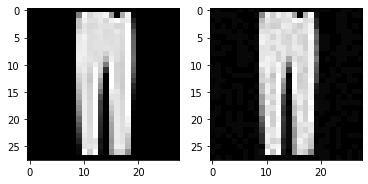

In [24]:
#CW
from CarliniWagner import CarliniWagnerDelta

LR = 0.1
NUM_STEPS = 10
EPSILON = 0.07

attack = CarliniWagnerDelta(sess, ff_module, num_steps=NUM_STEPS, epsilon=EPSILON,
                         data_interval=[-1.,1.], learning_rate=LR,
                         input_shape=input_shape, n_classes=n_classes)

adv = attack.run(x_orig[0], y_orig[0])

plot_imgs([x_orig, adv], 1, 2)


Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]


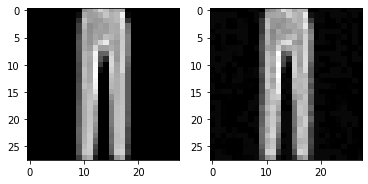

In [41]:
LR = 0.1
NUM_STEPS = 10
PROJ_ORD = np.inf
EPSILON = 0.07
ORD = 2
CONST = 1

attack = CarliniWagner(sess, ff_module, num_steps=NUM_STEPS,
                        proj_ord=PROJ_ORD, epsilon=EPSILON,
                        ord=ORD, const=CONST, data_interval=[-1.,1.],
                        learning_rate=LR, input_shape=input_shape, n_classes=n_classes)

adv = attack.run(x_orig[0], y_orig[0])

plot_imgs([x_orig, adv], 1, 2)


(1, 28, 28, 1) (1,)
correct label:  [1] Trouser


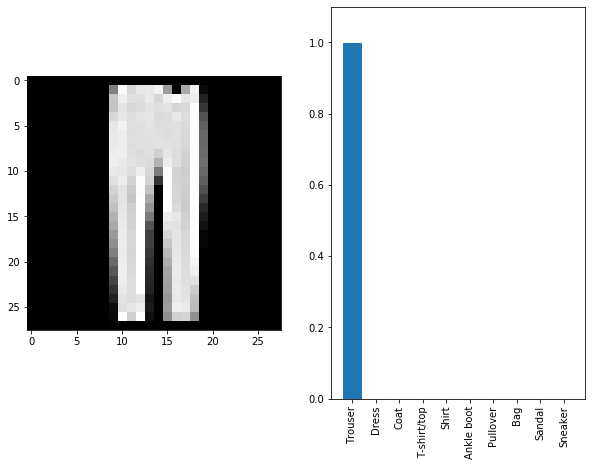

In [84]:
no_img = 24
dataset_str = TRAIN

x_orig = dataset.get_raw_elements(dataset_str, index_list=[no_img])
y_orig = dataset.get_raw_labels(dataset_str, index_list=[no_img])

print(x_orig.shape, y_orig.shape)
classify(x_orig, x, probs)
print("correct label: ", y_orig, dataset.label_to_name(y_orig[0]))

step 0, pred=1 Trouser
step 1, pred=1 Trouser
step 2, pred=1 Trouser
step 3, pred=1 Trouser
step 4, pred=1 Trouser
step 5, pred=1 Trouser
step 6, pred=1 Trouser
step 7, pred=1 Trouser
step 8, pred=1 Trouser
step 9, pred=1 Trouser
step 10, pred=1 Trouser
step 11, pred=1 Trouser
step 12, pred=1 Trouser
step 13, pred=1 Trouser
step 14, pred=1 Trouser
step 15, pred=1 Trouser
step 16, pred=1 Trouser
step 17, pred=1 Trouser
step 18, pred=1 Trouser
step 19, pred=1 Trouser
step 20, pred=1 Trouser
step 21, pred=1 Trouser
step 22, pred=1 Trouser
step 23, pred=1 Trouser
step 24, pred=1 Trouser
step 25, pred=1 Trouser
step 26, pred=1 Trouser
step 27, pred=1 Trouser
step 28, pred=1 Trouser
step 29, pred=1 Trouser
step 30, pred=1 Trouser
step 31, pred=1 Trouser
step 32, pred=1 Trouser
step 33, pred=1 Trouser
step 34, pred=1 Trouser
step 35, pred=1 Trouser
step 36, pred=1 Trouser
step 37, pred=1 Trouser
step 38, pred=1 Trouser
step 39, pred=1 Trouser


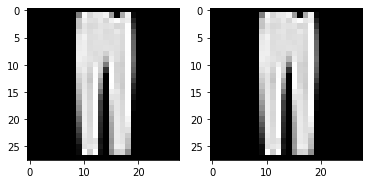

In [85]:
LR = 0.1
EPSILON = 0.1

lower = np.clip(x_orig-EPSILON, -1, 1)
upper = np.clip(x_orig+EPSILON, -1, 1)
adv = np.copy(x_orig)

for i in range(40):
    g, p = sess.run([grad, preds], {x: adv, y: y_orig})
    print('step %d, pred=%d %s' % (i, p, dataset.label_to_name(p[0])))
    # step
    adv += LR * g
    # project
    adv = np.clip(adv, lower, upper)

plot_imgs([x_orig, adv], 1, 2)

Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [1]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 1 [3]
attack in progress 

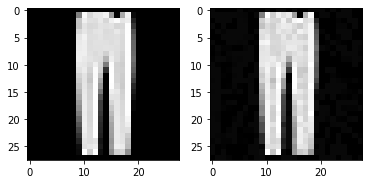

In [86]:
LR = 0.1
NUM_STEPS = 100
PROJ_ORD = np.inf
EPSILON = 0.07
ORD = 2
CONST = 1

attack = CarliniWagner(sess, ff_module, num_steps=NUM_STEPS,
                        proj_ord=PROJ_ORD, epsilon=EPSILON,
                        ord=ORD, const=CONST, data_interval=[-1.,1.],
                        learning_rate=LR, input_shape=input_shape, n_classes=n_classes)

adv = attack.run(x_orig[0], y_orig[0])

plot_imgs([x_orig, adv], 1, 2)

(1, 28, 28, 1) (1,)
correct label:  [5] Sandal


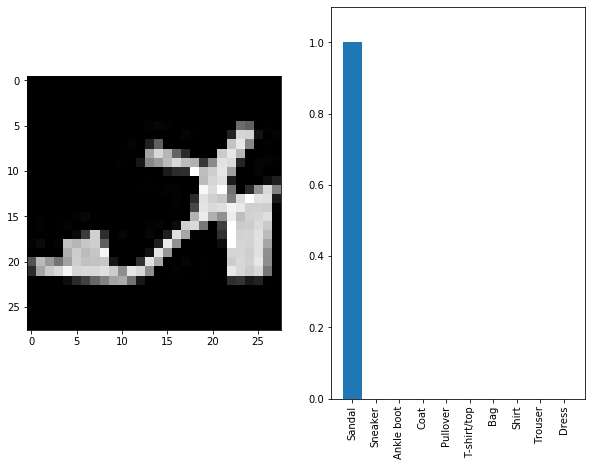

In [87]:
no_img = 30
dataset_str = TRAIN

x_orig = dataset.get_raw_elements(dataset_str, index_list=[no_img])
y_orig = dataset.get_raw_labels(dataset_str, index_list=[no_img])

print(x_orig.shape, y_orig.shape)
classify(x_orig, x, probs)
print("correct label: ", y_orig, dataset.label_to_name(y_orig[0]))

step 0, pred=5 Sandal
step 1, pred=5 Sandal
step 2, pred=5 Sandal
step 3, pred=5 Sandal
step 4, pred=5 Sandal
step 5, pred=5 Sandal
step 6, pred=5 Sandal
step 7, pred=5 Sandal
step 8, pred=5 Sandal
step 9, pred=5 Sandal
step 10, pred=5 Sandal
step 11, pred=5 Sandal
step 12, pred=5 Sandal
step 13, pred=5 Sandal
step 14, pred=5 Sandal
step 15, pred=5 Sandal
step 16, pred=5 Sandal
step 17, pred=5 Sandal
step 18, pred=5 Sandal
step 19, pred=5 Sandal
step 20, pred=5 Sandal
step 21, pred=5 Sandal
step 22, pred=5 Sandal
step 23, pred=5 Sandal
step 24, pred=5 Sandal
step 25, pred=5 Sandal
step 26, pred=5 Sandal
step 27, pred=5 Sandal
step 28, pred=5 Sandal
step 29, pred=5 Sandal
step 30, pred=5 Sandal
step 31, pred=5 Sandal
step 32, pred=5 Sandal
step 33, pred=5 Sandal
step 34, pred=5 Sandal
step 35, pred=5 Sandal
step 36, pred=5 Sandal
step 37, pred=5 Sandal
step 38, pred=5 Sandal
step 39, pred=5 Sandal


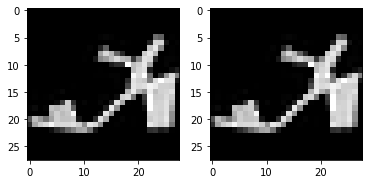

In [88]:
LR = 0.1
EPSILON = 0.1

lower = np.clip(x_orig-EPSILON, -1, 1)
upper = np.clip(x_orig+EPSILON, -1, 1)
adv = np.copy(x_orig)

for i in range(40):
    g, p = sess.run([grad, preds], {x: adv, y: y_orig})
    print('step %d, pred=%d %s' % (i, p, dataset.label_to_name(p[0])))
    # step
    adv += LR * g
    # project
    adv = np.clip(adv, lower, upper)

plot_imgs([x_orig, adv], 1, 2)

Parsing network network...
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Conv2D
 Loading sonnet module BatchNorm
 Loading sonnet module MaxPooling2D
 Loading sonnet module Dropout
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 5 [5]
attack in progress 

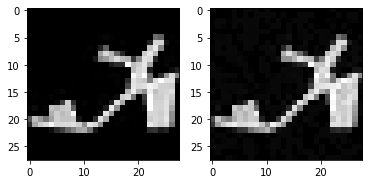

In [72]:
LR = 0.07
NUM_STEPS = 100
PROJ_ORD = np.inf
EPSILON = 0.07
ORD = 2
CONST = 1

attack = CarliniWagner(sess, ff_module, num_steps=NUM_STEPS,
                        proj_ord=PROJ_ORD, epsilon=EPSILON,
                        ord=ORD, const=CONST, data_interval=[-1.,1.],
                        learning_rate=LR, input_shape=input_shape, n_classes=n_classes)

adv = attack.run(x_orig[0], y_orig[0])

plot_imgs([x_orig, adv], 1, 2)